In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
m = 100
x = 6 * np.random.rand(m, 1) -3
y = .5 * x**2 + x + 2 + np.random.randn(m, 1)

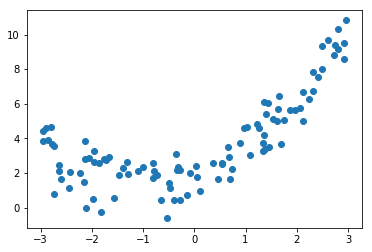

In [4]:
plt.scatter(x, y)

In [6]:
x_n = np.c_[x, x**2]
x_n

array([[ -7.96453044e-01,   6.34337452e-01],
       [ -1.94905799e+00,   3.79882706e+00],
       [ -7.98428508e-01,   6.37488083e-01],
       [ -2.89552339e+00,   8.38405569e+00],
       [  1.02685237e+00,   1.05442579e+00],
       [  1.09526080e+00,   1.19959622e+00],
       [ -2.42085166e+00,   5.86052275e+00],
       [  1.40296824e+00,   1.96831988e+00],
       [  1.07894115e-01,   1.16411402e-02],
       [ -2.96404748e+00,   8.78557749e+00],
       [ -7.29145814e-01,   5.31653618e-01],
       [  2.96119194e+00,   8.76865770e+00],
       [ -2.63225731e+00,   6.92877856e+00],
       [ -2.13179446e+00,   4.54454761e+00],
       [  2.61735681e+00,   6.85055669e+00],
       [  1.96140432e+00,   3.84710692e+00],
       [ -6.51424585e-01,   4.24353990e-01],
       [ -2.78426409e+00,   7.75212654e+00],
       [  2.80728909e+00,   7.88087203e+00],
       [  2.11330478e+00,   4.46605709e+00],
       [  1.37185473e+00,   1.88198540e+00],
       [  1.75601171e+00,   3.08357714e+00],
       [ -

In [7]:
theta_b = np.linalg.inv(x_n.T @ x_n) @ x_n.T @ y

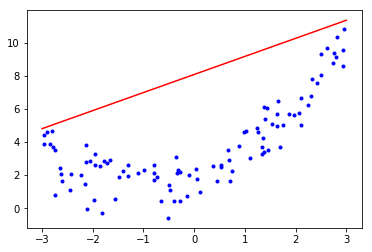

In [11]:
plt.plot(x, y, 'b.')
t = np.array([[-3],[3]])

# Need to add intercespt point

plt.plot(t, np.c_[t, t**2] @ theta_b, 'r-')
plt.show()